Reproduce the figure in Makela 2008 manuscript

In [1]:
from modules.cn_allocation import Makela08_alloc_parameter, Makela08_alloc_mainsolver, Makela08_alloc_auxvar_solver
import numpy as np
import matplotlib.pyplot as plt

# params_dict = Makela08_alloc_parameter.get_param_dict(dict_name="params_makela08_pine")

params_dict_pine = Makela08_alloc_parameter.get_param_dict(dict_name="params_makela08_pine")
params_dict_spruce = Makela08_alloc_parameter.get_param_dict(dict_name="params_makela08_spruce")

psi_r_solver_pine = Makela08_alloc_mainsolver.PsiRCubicEqnSolver(params_dict_pine)
psi_r_solver_spruce = Makela08_alloc_mainsolver.PsiRCubicEqnSolver(params_dict_spruce)

G_numeric_solver_pine = Makela08_alloc_mainsolver.BiomassProductionOptimizerNumeric(psi_r_solver_pine, params_dict_pine)
G_numeric_solver_spruce = Makela08_alloc_mainsolver.BiomassProductionOptimizerNumeric(psi_r_solver_spruce, params_dict_spruce)

Original axis N availability: 10\~50 kg N/t FR/yr, convert to 0.01\~0.05 kg N/kg FR/yr

In [2]:
import concurrent.futures
# 1- Pine
plt4a_DM_alloc_fraction_list_pine = [] # [[Nup_max_specific, DM_foliage, DM_wood, DM_root], [], ...]
plt2_NconcF_prod_list_pine = []

def process_pine(Nup_max_specific):
    print("Pine: Nup_max_specific =", Nup_max_specific)
    
    Nconc_foliage_opt, DM_production_opt = G_numeric_solver_pine.optimize_total_biomass_production(Nup_max_specific)
    
    downstream_var_solver = Makela08_alloc_auxvar_solver.DownstreamValueSolver(
        params_dict_pine, Nup_max_specific, Nconc_foliage_opt, DM_production_opt)
    
    DM_foliage, DM_wood, DM_root = downstream_var_solver.solve_optimum_biomass(method="C")
    
    _plt4a_entry = [Nup_max_specific, DM_foliage, DM_wood, DM_root, float(DM_foliage + DM_wood + DM_root)]
    _plt2_entry = [Nup_max_specific, Nconc_foliage_opt, DM_production_opt]
    
    return _plt4a_entry, _plt2_entry
    
# 2- Spruce
plt4a_DM_alloc_fraction_list_spruce = [] # [[Nup_max_specific, DM_foliage, DM_wood, DM_root], [], ...]
plt2_NconcF_prod_list_spruce = []

#for Nup_max_specific in np.arange(10, 50+1, 1)/1000:  # Nup_max_specific
#    
#    print("Spruce: Nup_max_specific =", Nup_max_specific)
#    
#    Nconc_foliage_opt, DM_production_opt = G_numeric_solver_spruce.optimize_total_biomass_production(Nup_max_specific)
#    
#    downstream_var_solver = Makela08_alloc_auxvar_solver.DownstreamValueSolver(
#        params_dict_spruce, Nup_max_specific, Nconc_foliage_opt, DM_production_opt)
#    
#    DM_foliage, DM_wood, DM_root = downstream_var_solver.solve_optimum_biomass(method="C")
#    
#    plt4a_DM_alloc_fraction_list_spruce.append([Nup_max_specific, DM_foliage, DM_wood, DM_root, float(DM_foliage+DM_wood+DM_root)])
#    
#    plt2_NconcF_prod_list_spruce.append([Nup_max_specific, Nconc_foliage_opt, DM_production_opt])
    
def process_spruce(Nup_max_specific):
    print("Spruce: Nup_max_specific =", Nup_max_specific)
    
    Nconc_foliage_opt, DM_production_opt = G_numeric_solver_spruce.optimize_total_biomass_production(Nup_max_specific)
    
    downstream_var_solver = Makela08_alloc_auxvar_solver.DownstreamValueSolver(
        params_dict_spruce, Nup_max_specific, Nconc_foliage_opt, DM_production_opt)
    
    DM_foliage, DM_wood, DM_root = downstream_var_solver.solve_optimum_biomass(method="C")
    
    _plt4a_entry = [Nup_max_specific, DM_foliage, DM_wood, DM_root, float(DM_foliage + DM_wood + DM_root)]
    _plt2_entry = [Nup_max_specific, Nconc_foliage_opt, DM_production_opt]
    
    return _plt4a_entry, _plt2_entry

Nup_max_specific_values = np.arange(10, 50 + 1, 1) / 1000

with concurrent.futures.ThreadPoolExecutor() as executor:
    results_pine = list(executor.map(process_pine, Nup_max_specific_values))
    
with concurrent.futures.ThreadPoolExecutor() as executor:
    results_spruce = list(executor.map(process_spruce, Nup_max_specific_values))

# Unpacking the results
for plt4a_entry, plt2_entry in results_pine:
    plt4a_DM_alloc_fraction_list_pine.append(plt4a_entry)
    plt2_NconcF_prod_list_pine.append(plt2_entry)
    
for plt4a_entry, plt2_entry in results_spruce:
    plt4a_DM_alloc_fraction_list_spruce.append(plt4a_entry)
    plt2_NconcF_prod_list_spruce.append(plt2_entry)

Pine: Nup_max_specific =Pine: Nup_max_specific = 0.011
Pine: Nup_max_specific = 0.012
Pine: Nup_max_specific = 0.013
 0.01
Pine: Nup_max_specific = 0.014
Pine: Nup_max_specific = 0.015
Pine: Nup_max_specific = 0.016
Pine: Nup_max_specific = 0.017
Pine: Nup_max_specific = 0.018
Pine: Nup_max_specific = 0.019
Pine: Nup_max_specific = 0.02
Pine: Nup_max_specific = 0.021
Pine: Nup_max_specific = 0.022
Pine: Nup_max_specific = 0.023
Pine: Nup_max_specific = 0.024
Pine: Nup_max_specific = 0.025
Pine: Nup_max_specific = 0.026
Pine: Nup_max_specific = 0.027
Pine: Nup_max_specific = 0.028
Pine: Nup_max_specific = 0.029
Pine: Nup_max_specific = 0.03
Pine: Nup_max_specific = 0.031
Pine: Nup_max_specific = 0.032
Pine: Nup_max_specific =Pine: Nup_max_specific = 0.034
 0.033
Pine: Nup_max_specific = 0.035
Pine: Nup_max_specific = 0.036
Pine: Nup_max_specific = 0.037
Pine: Nup_max_specific = 0.038
Pine: Nup_max_specific = 0.039
Pine: Nup_max_specific = 0.04
Pine: Nup_max_specific = 0.041
Pine: Nup_ma

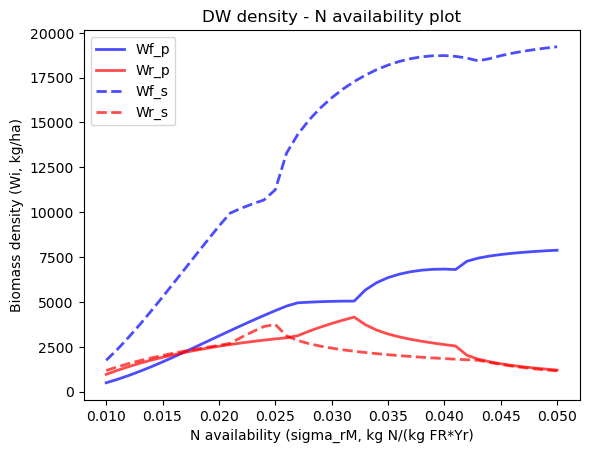

In [3]:
Nmax_vec1_pine = [pair[0] for pair in plt4a_DM_alloc_fraction_list_pine]
Wf_vec_pine = [pair[1] for pair in plt4a_DM_alloc_fraction_list_pine]
Ww_vec_pine = [pair[2] for pair in plt4a_DM_alloc_fraction_list_pine]
Wr_vec_pine = [pair[3] for pair in plt4a_DM_alloc_fraction_list_pine]

Nmax_vec1_spruce = [pair[0] for pair in plt4a_DM_alloc_fraction_list_spruce]
Wf_vec_spruce = [pair[1] for pair in plt4a_DM_alloc_fraction_list_spruce]
Ww_vec_spruce = [pair[2] for pair in plt4a_DM_alloc_fraction_list_spruce]
Wr_vec_spruce = [pair[3] for pair in plt4a_DM_alloc_fraction_list_spruce]

fig1 = plt.figure("Figure 1")
plt.plot(Nmax_vec1_pine, Wf_vec_pine, color='blue', linestyle='-', linewidth=2, alpha=0.7, label='Wf_p')
plt.plot(Nmax_vec1_pine, Wr_vec_pine, color='red', linestyle='-', linewidth=2, alpha=0.7, label="Wr_p")
plt.plot(Nmax_vec1_pine, Wf_vec_spruce, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Wf_s')
plt.plot(Nmax_vec1_pine, Wr_vec_spruce, color='red', linestyle='--', linewidth=2, alpha=0.7, label="Wr_s")
plt.title('DW density - N availability plot')
plt.xlabel('N availability (sigma_rM, kg N/(kg FR*Yr)')
plt.ylabel('Biomass density (Wi, kg/ha)')
plt.legend()
plt.show()  # Display the plot

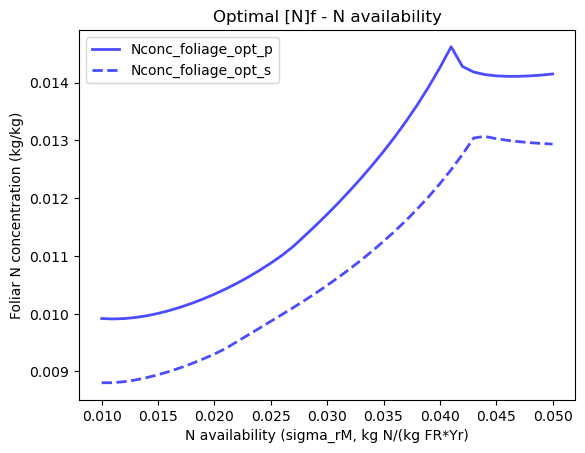

In [8]:
Nmax_vec2_pine = [pair[0] for pair in plt2_NconcF_prod_list_pine]
Nconc_foliage_opt_vec_pine = [pair[1] for pair in plt2_NconcF_prod_list_pine]
DM_production_opt_vec_pine = [pair[2] for pair in plt2_NconcF_prod_list_pine]

Nmax_vec2_spruce = [pair[0] for pair in plt2_NconcF_prod_list_spruce]
Nconc_foliage_opt_vec_spruce = [pair[1] for pair in plt2_NconcF_prod_list_spruce]
DM_production_opt_vec_spruce = [pair[2] for pair in plt2_NconcF_prod_list_spruce]

fig2 = plt.figure("Figure 2")
plt.plot(Nmax_vec2_pine, Nconc_foliage_opt_vec_pine, color='blue', linestyle='-', linewidth=2, alpha=0.7, label='Nconc_foliage_opt_p')
plt.plot(Nmax_vec2_spruce, Nconc_foliage_opt_vec_spruce, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Nconc_foliage_opt_s')
plt.title('Optimal [N]f - N availability')
plt.xlabel('N availability (sigma_rM, kg N/(kg FR*Yr)')
plt.ylabel('Foliar N concentration (kg/kg)')
plt.legend()
plt.show()  # Display the plot

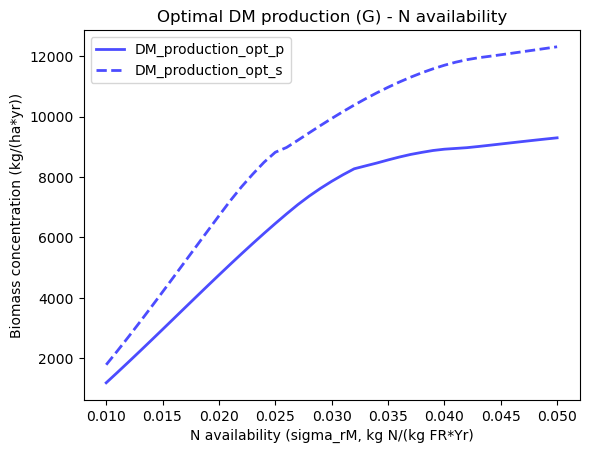

In [9]:
fig3 = plt.figure("Figure 3")
plt.plot(Nmax_vec2_pine, DM_production_opt_vec_pine, color='blue', linestyle='-', linewidth=2, alpha=0.7, label='DM_production_opt_p')
plt.plot(Nmax_vec2_spruce, DM_production_opt_vec_spruce, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='DM_production_opt_s')
plt.title('Optimal DM production (G) - N availability')
plt.xlabel('N availability (sigma_rM, kg N/(kg FR*Yr)')
plt.ylabel('Biomass concentration (kg/(ha*yr))')
plt.legend()
plt.show()  # Display the plot